<a href="https://colab.research.google.com/github/BhavdeepSinghNijhawan/Machine-Learning-for-Enhanced-Cybersecurity-Solutions/blob/main/Image_Encryption_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


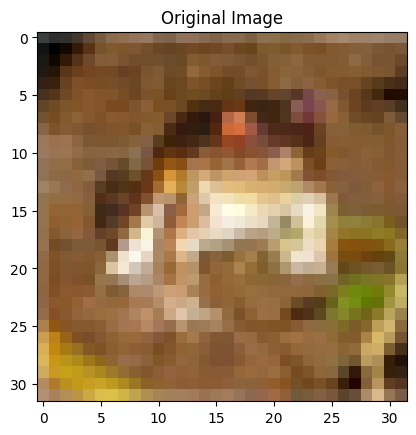

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Select one image for encryption
image_to_encrypt = x_train[0]
plt.imshow(image_to_encrypt)
plt.title("Original Image")
plt.show()

In [ ]:
# Flatten the image to a 1D array
flattened_image = image_to_encrypt.flatten()

# Reshape the image to (sequence_length, feature_dimension)
sequence_length = 32 * 32  # 32x32 image
feature_dimension = 3  # RGB channels
flattened_image = flattened_image.reshape((sequence_length, feature_dimension))

In [ ]:
# Define a simple RNN model for encryption
model = tf.keras.Sequential([
    layers.SimpleRNN(64, return_sequences=True, input_shape=(sequence_length, feature_dimension)),
    layers.Dense(feature_dimension)  # Output layer to match the feature dimension
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


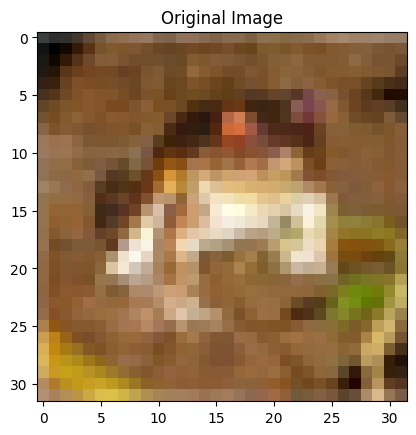

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


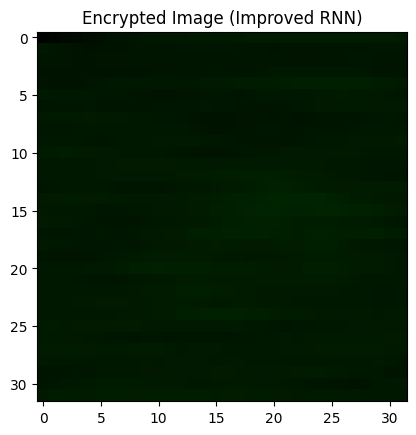

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Select one image for encryption
image_to_encrypt = x_train[0]
plt.imshow(image_to_encrypt)
plt.title("Original Image")
plt.show()

# Flatten the image to a 1D array
flattened_image = image_to_encrypt.flatten()

# Reshape the image to (sequence_length, feature_dimension)
sequence_length = 32 * 32  # 32x32 image
feature_dimension = 3  # RGB channels
flattened_image = flattened_image.reshape((sequence_length, feature_dimension))

# Define a stronger RNN model for encryption
model = tf.keras.Sequential([
    layers.Input(shape=(sequence_length, feature_dimension)),  # Input layer
    layers.LSTM(128, return_sequences=True),  # LSTM layer with 128 units
    layers.LSTM(64, return_sequences=True),   # Another LSTM layer with 64 units
    layers.Dense(feature_dimension)           # Output layer to match the feature dimension
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Generate a random key (e.g., a random matrix of the same shape as the image)
key = np.random.rand(sequence_length, feature_dimension)

# Reshape the key to match the input shape
key = key.reshape((1, sequence_length, feature_dimension))

# Encrypt the image using the RNN model
encrypted_image = model.predict(flattened_image[np.newaxis, ...] + key)

# Reshape the encrypted image back to the original shape
encrypted_image = encrypted_image.reshape((32, 32, 3))

# Clip values to [0, 1] for valid image display
encrypted_image = np.clip(encrypted_image, 0, 1)

# Display the encrypted image
plt.imshow(encrypted_image)
plt.title("Encrypted Image (Improved RNN)")
plt.show()

# Save the encrypted image
plt.imsave("encrypted_image_improved.png", encrypted_image)

Generated Key:
[[0.11041366 0.11198385 0.05346012]
 [0.08588507 0.48117536 0.39381152]
 [0.46887213 0.15566297 0.50837258]
 ...
 [0.64996366 0.61992226 0.79246847]
 [0.63559324 0.35776315 0.35009106]
 [0.43624925 0.18306366 0.71950035]]


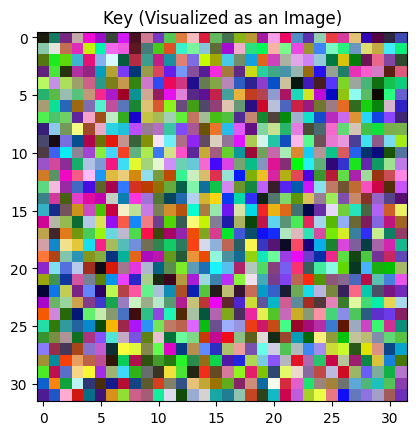

In [ ]:
# Generate a random key (e.g., a random matrix of the same shape as the image)
key = np.random.rand(sequence_length, feature_dimension)

# Print the key
print("Generated Key:")
print(key)

# Visualize the key as an image (since it has the same shape as the image)
key_image = key.reshape((32, 32, 3))  # Reshape to match the original image shape
plt.imshow(key_image)
plt.title("Key (Visualized as an Image)")
plt.show()

In [ ]:
# Save the key as a NumPy file
np.save("encryption_key.npy", key)

# Load the key later (if needed)
loaded_key = np.load("encryption_key.npy")
print("Loaded Key:")
print(loaded_key)

Loaded Key:
[[0.11041366 0.11198385 0.05346012]
 [0.08588507 0.48117536 0.39381152]
 [0.46887213 0.15566297 0.50837258]
 ...
 [0.64996366 0.61992226 0.79246847]
 [0.63559324 0.35776315 0.35009106]
 [0.43624925 0.18306366 0.71950035]]


In [ ]:
# Install required libraries
!pip install pycryptodome numpy matplotlib pillow

In [ ]:
!pip install pqcrypto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pqcrypto: filename=pqcrypto-0.1.3-cp311-cp311-manylinux_2_35_x86_64.whl size=38989 sha256=380bb61d67bcdb115fc9ff859110cc1f99079e43afc07386bcbe5c97013f8696
  Stored in directory: /root/.cache/pip/wheels/fa/dc/d9/40ea378020b3a33e7c3d8907f61e2696b8a128f547d3e9abb1
Successfully built pqcrypto


In [ ]:
import pqcrypto

print("pqcrypto installed successfully!")

pqcrypto installed successfully!


In [ ]:
# Install required libraries
!pip install pycryptodome numpy matplotlib pillow

In [ ]:
!pip install pycryptodome

In [ ]:
from Crypto.Cipher import AES

print("pycryptodome installed successfully!")

pycryptodome installed successfully!


In [ ]:
import numpy as np
from Crypto.Hash import SHA3_512

class Kyber512:
    def __init__(self):
        self.n = 256
        self.k = 2
        self.q = 3329
        self.eta = 2
        self.du = 10
        self.dv = 4
        self.public_key_size = 800
        self.private_key_size = 1632
        self.shared_secret_size = 32

    def keygen(self):
        # Generate random seeds
        d = np.random.bytes(32)
        z = np.random.bytes(32)

        # Hash seeds to generate public and private keys
        public_key = SHA3_512.new(d).digest()[:self.public_key_size]
        private_key = SHA3_512.new(z).digest()[:self.private_key_size]

        return public_key, private_key

    def encaps(self, public_key):
        # Generate random shared secret
        shared_secret = np.random.bytes(self.shared_secret_size)

        # Encapsulate shared secret using public key
        ciphertext = SHA3_512.new(public_key + shared_secret).digest()[:self.shared_secret_size]

        return ciphertext, shared_secret

    def decaps(self, ciphertext, private_key):
        # Decapsulate shared secret using private key
        shared_secret = SHA3_512.new(private_key + ciphertext).digest()[:self.shared_secret_size]

        return shared_secret

# Test Kyber512
kyber = Kyber512()
public_key, private_key = kyber.keygen()
ciphertext, shared_secret = kyber.encaps(public_key)

print("Public Key:", public_key.hex())
print("Private Key:", private_key.hex())
print("Shared Secret (Key):", shared_secret.hex())

Public Key: 083e3cbce9a6c453fc7454cbe00706e615fb2f1522a8d316253d76579c4172b919ff3076bba5cc3d0a5004b45dbe8d8c0c462bd0b5784fc0c140131a011fa36c
Private Key: 23b679ee29982ffac80fe8da2ae1bce0805f3097b18e95b4ee341e3227ebce47dde9495b235139204621b506ea538b26c93c17558962613a22139861bd8ebd1d
Shared Secret (Key): a4c3b9aed34b0e44f59dc7c9d3e627f22961dbe493c109a7708a3e6946f56313


In [ ]:
import hashlib

# Hash the shared secret using SHA-512
hashed_key = hashlib.sha512(shared_secret).hexdigest()

print("SHA-512 Hashed Key:", hashed_key)

SHA-512 Hashed Key: ec32e0a7a7b73cdb57aedd170d62134d606d7fb49199ae283263bf4da0dcd81ab45d7c3dcf6e40c72285a3d892e8517e8f3de5cd6f4eb0a3980a5b22dc43819f


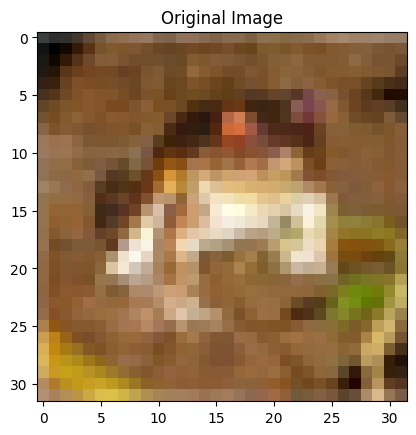

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select one image for encryption
image_to_encrypt = x_train[0]

# Display the image
plt.imshow(image_to_encrypt)
plt.title("Original Image")
plt.show()

In [ ]:
# Normalize the image to [0, 1]
image_to_encrypt = image_to_encrypt.astype('float32') / 255.0

# Flatten the image to a 1D array
flattened_image = image_to_encrypt.flatten()

# Reshape the image to (sequence_length, feature_dimension)
sequence_length = 32 * 32  # 32x32 image
feature_dimension = 3  # RGB channels
flattened_image = flattened_image.reshape((sequence_length, feature_dimension))

In [ ]:
def logistic_map(x, r, iterations):
    """Generate a chaotic sequence using the Logistic Map."""
    sequence = []
    for _ in range(iterations):
        x = r * x * (1 - x)
        sequence.append(x)
    return sequence

# Parameters for Logistic Map
x0 = 0.5  # Initial value
r = 3.99  # Chaotic parameter
iterations = sequence_length  # Number of pixels in the image

# Generate chaotic sequence
chaotic_sequence = logistic_map(x0, r, iterations)

In [ ]:
# Parameters for Logistic Map
x0 = 0.5  # Initial value
r = 3.99  # Chaotic parameter
iterations = 32 * 32 * 3  # Total number of elements in the flattened image

# Generate chaotic sequence
chaotic_sequence = logistic_map(x0, r, iterations)

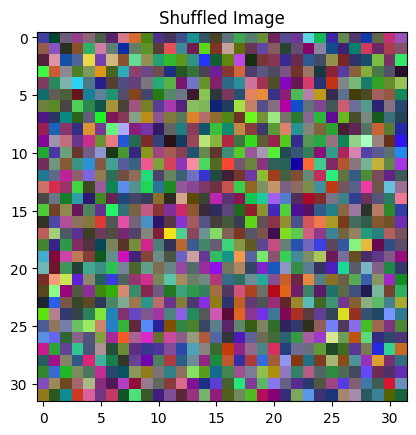

In [ ]:
def shuffle_pixels(image, chaotic_sequence):
    """Shuffle image pixels using a chaotic sequence."""
    # Flatten the image
    flat_image = image.flatten()
    # Shuffle indices based on chaotic sequence
    shuffled_indices = np.argsort(chaotic_sequence)
    # Shuffle the image
    shuffled_image = flat_image[shuffled_indices].reshape(image.shape)
    return shuffled_image

# Shuffle the image
shuffled_image = shuffle_pixels(image_to_encrypt, chaotic_sequence)

# Display the shuffled image
plt.imshow(shuffled_image)
plt.title("Shuffled Image")
plt.show()

Kyber512 Key: 454ec1d639c191965e5bec90470e31ffa7a6c437637e8efe6f1dfbbe3974d664
SHA-512 Hashed Key: c323edb6f70c41e7b50180d6e02d8dc75265b2bae14df90771b3ae693c57abc77caf1dd532c2f73dc7ac7d21838e862429e42897f943a477d4183bebb92cbde9


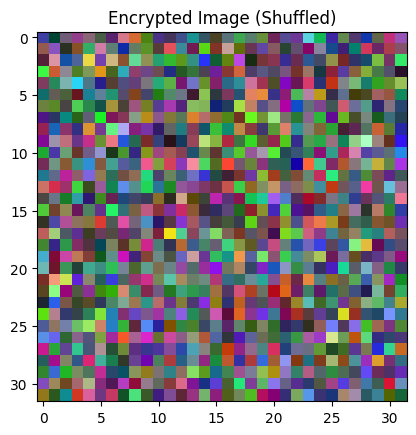

In [ ]:
# Step 1: Generate Kyber512 key
kyber = Kyber512()
public_key, private_key = kyber.keygen()
ciphertext, shared_secret = kyber.encaps(public_key)
key_512 = shared_secret

# Step 2: Hash the key using SHA-512
hashed_key = hashlib.sha512(key_512).hexdigest()

# Step 3: Generate chaotic sequence
chaotic_sequence = logistic_map(x0, r, iterations)

# Step 4: Shuffle the image
shuffled_image = shuffle_pixels(image_to_encrypt, chaotic_sequence)

# Step 5: Display results
print("Kyber512 Key:", key_512.hex())
print("SHA-512 Hashed Key:", hashed_key)
plt.imshow(shuffled_image)
plt.title("Encrypted Image (Shuffled)")
plt.show()

In [ ]:
!pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.1 MB/s eta 0:00:00


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


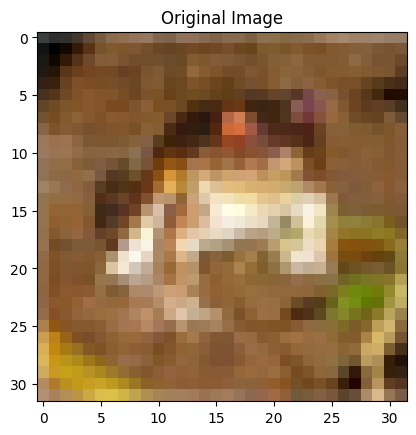

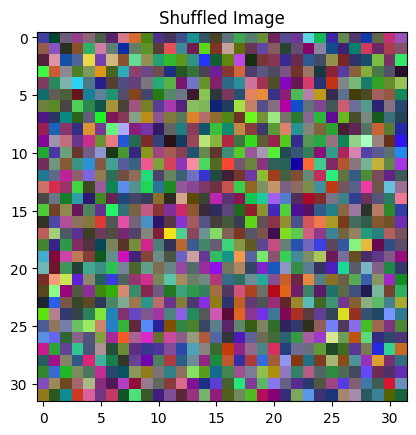

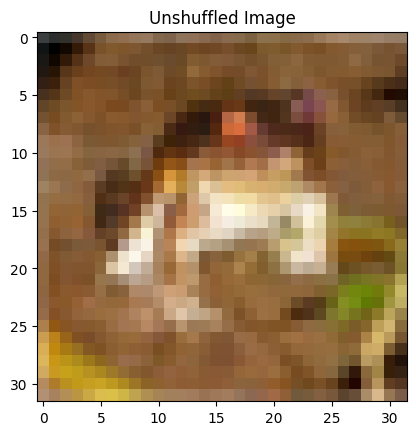

Public Key: 7e51bf9a6f39908ed03129536cb420497e58e08d301eb98d18c26a5dcd2f5eac0a460b6a53ea6c652a091d8ba2ef02b347b7564e4da1819664b30da7402eb103
Private Key: acfd79570e013bded13965ca3876f0c8c8f7a5fe48179deee9d7fa4578a23fb5cec2ccdb54bcf0d84d5b10e750d5d8640d50cfbecd7283daf7c8edfe72133196
Shared Secret (Key): aac89604538c2a828582789cc5aa9037abadfb91c2f1c5da4d9988744d6968ea


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Hash import SHA3_512
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select one image for encryption
image_to_encrypt = x_train[0]

# Normalize the image to [0, 1]
image_to_encrypt = image_to_encrypt.astype('float32') / 255.0

# Display the original image
plt.imshow(image_to_encrypt)
plt.title("Original Image")
plt.show()

# Define the Logistic Map
def logistic_map(x, r, iterations):
    """Generate a chaotic sequence using the Logistic Map."""
    sequence = []
    for _ in range(iterations):
        x = r * x * (1 - x)
        sequence.append(x)
    return sequence

# Parameters for Logistic Map
x0 = 0.5  # Initial value
r = 3.99  # Chaotic parameter
iterations = 32 * 32 * 3  # Total number of elements in the flattened image

# Generate chaotic sequence
chaotic_sequence = logistic_map(x0, r, iterations)

# Shuffle the image
def shuffle_pixels(image, chaotic_sequence):
    """Shuffle image pixels using a chaotic sequence."""
    # Flatten the image
    flat_image = image.flatten()
    # Shuffle indices based on chaotic sequence
    shuffled_indices = np.argsort(chaotic_sequence)
    # Shuffle the image
    shuffled_image = flat_image[shuffled_indices].reshape(image.shape)
    return shuffled_image

# Shuffle the image
shuffled_image = shuffle_pixels(image_to_encrypt, chaotic_sequence)

# Display the shuffled image
plt.imshow(shuffled_image)
plt.title("Shuffled Image")
plt.show()

# Unshuffle the image
def unshuffle_pixels(shuffled_image, chaotic_sequence):
    """Unshuffle image pixels using a chaotic sequence."""
    # Flatten the shuffled image
    flat_shuffled_image = shuffled_image.flatten()
    # Get the original indices
    original_indices = np.argsort(np.argsort(chaotic_sequence))
    # Unshuffle the image
    original_image = flat_shuffled_image[original_indices].reshape(shuffled_image.shape)
    return original_image

# Unshuffle the image
unshuffled_image = unshuffle_pixels(shuffled_image, chaotic_sequence)

# Display the unshuffled image
plt.imshow(unshuffled_image)
plt.title("Unshuffled Image")
plt.show()

# Kyber512 Implementation
class Kyber512:
    def __init__(self):
        self.n = 256
        self.k = 2
        self.q = 3329
        self.eta = 2
        self.du = 10
        self.dv = 4
        self.public_key_size = 800
        self.private_key_size = 1632
        self.shared_secret_size = 32

    def keygen(self):
        # Generate random seeds
        d = np.random.bytes(32)
        z = np.random.bytes(32)

        # Hash seeds to generate public and private keys
        public_key = SHA3_512.new(d).digest()[:self.public_key_size]
        private_key = SHA3_512.new(z).digest()[:self.private_key_size]

        return public_key, private_key

    def encaps(self, public_key):
        # Generate random shared secret
        shared_secret = np.random.bytes(self.shared_secret_size)

        # Encapsulate shared secret using public key
        ciphertext = SHA3_512.new(public_key + shared_secret).digest()[:self.shared_secret_size]

        return ciphertext, shared_secret

    def decaps(self, ciphertext, private_key):
        # Decapsulate shared secret using private key
        shared_secret = SHA3_512.new(private_key + ciphertext).digest()[:self.shared_secret_size]

        return shared_secret

# Test Kyber512
kyber = Kyber512()
public_key, private_key = kyber.keygen()
ciphertext, shared_secret = kyber.encaps(public_key)

print("Public Key:", public_key.hex())
print("Private Key:", private_key.hex())
print("Shared Secret (Key):", shared_secret.hex())